In [302]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [303]:
# this code will read all sheets in excel and return dictionary of data frames
Data_dict = pd.read_excel('AdventureWorks_Sales.xlsx',
                          sheet_name=['Customer_data','Sales_data','Reseller_data','Date_data','Product_data','Sales_Territory_data','Sales_Order_data'])

In [304]:
# this code snippet convert all data frames column names into lower case
for i in Data_dict:
    Data_dict[i].columns = map(str.lower, Data_dict[i].columns)

In [305]:
#let's seprate data frames from dictionary for further analysis
customer = Data_dict['Customer_data']
sales = Data_dict['Sales_data']
reseller = Data_dict['Reseller_data']
date = Data_dict['Date_data']
product = Data_dict['Product_data']
Sales_Territory = Data_dict['Sales_Territory_data']
Sales_Order = Data_dict['Sales_Order_data']

In [306]:
#merge entire dataset in one data frame
df = pd.merge(sales,customer,how="left",on="customerkey")
df = pd.merge(df,reseller,how="left",on="resellerkey")
df = pd.merge(df,date,how="left",right_on="datekey",left_on="orderdatekey")
df = pd.merge(df,product,how="left",on="productkey")
df = pd.merge(df,Sales_Territory,how="left",on="salesterritorykey")
df = pd.merge(df,Sales_Order,how="left",on="salesorderlinekey")
df.head(5)

,salesorderlinekey,resellerkey,customerkey,productkey,orderdatekey,duedatekey,shipdatekey,salesterritorykey,order quantity,unit price,...,list price,model,subcategory,category,region,country,group,channel,sales order,sales order line
0,43659001,676,-1,349,20170702,20170712,20170709.0,5,1,2024.994,...,3374.99,Mountain-100,Mountain Bikes,Bikes,Southeast,United States,North America,Reseller,SO43659,SO43659 - 1
1,43659002,676,-1,350,20170702,20170712,20170709.0,5,3,2024.994,...,3374.99,Mountain-100,Mountain Bikes,Bikes,Southeast,United States,North America,Reseller,SO43659,SO43659 - 2
2,43659003,676,-1,351,20170702,20170712,20170709.0,5,1,2024.994,...,3374.99,Mountain-100,Mountain Bikes,Bikes,Southeast,United States,North America,Reseller,SO43659,SO43659 - 3
3,43659004,676,-1,344,20170702,20170712,20170709.0,5,1,2039.994,...,3399.99,Mountain-100,Mountain Bikes,Bikes,Southeast,United States,North America,Reseller,SO43659,SO43659 - 4
4,43659005,676,-1,345,20170702,20170712,20170709.0,5,1,2039.994,...,3399.99,Mountain-100,Mountain Bikes,Bikes,Southeast,United States,North America,Reseller,SO43659,SO43659 - 5


In [307]:
#let's drop unnecessary column and organized it.
df = df[['sales order','date','sku','product','category','subcategory','model','order quantity',
          'product standard cost','total product cost','list price','sales amount','customer',
          'reseller','country','region','city_x','city_y','postal code_x', 'postal code_y']]

In [308]:
df.head(5)

,sales order,date,sku,product,category,subcategory,model,order quantity,product standard cost,total product cost,list price,sales amount,customer,reseller,country,region,city_x,city_y,postal code_x,postal code_y
0,SO43659,2017-07-02,BK-M82B-42,"Mountain-100 Black, 42",Bikes,Mountain Bikes,Mountain-100,1,1898.0944,1898.0944,3374.99,2024.994,[Not Applicable],Better Bike Shop,United States,Southeast,[Not Applicable],Austell,[Not Applicable],30106
1,SO43659,2017-07-02,BK-M82B-44,"Mountain-100 Black, 44",Bikes,Mountain Bikes,Mountain-100,3,1898.0944,5694.2832,3374.99,6074.982,[Not Applicable],Better Bike Shop,United States,Southeast,[Not Applicable],Austell,[Not Applicable],30106
2,SO43659,2017-07-02,BK-M82B-48,"Mountain-100 Black, 48",Bikes,Mountain Bikes,Mountain-100,1,1898.0944,1898.0944,3374.99,2024.994,[Not Applicable],Better Bike Shop,United States,Southeast,[Not Applicable],Austell,[Not Applicable],30106
3,SO43659,2017-07-02,BK-M82S-38,"Mountain-100 Silver, 38",Bikes,Mountain Bikes,Mountain-100,1,1912.1544,1912.1544,3399.99,2039.994,[Not Applicable],Better Bike Shop,United States,Southeast,[Not Applicable],Austell,[Not Applicable],30106
4,SO43659,2017-07-02,BK-M82S-42,"Mountain-100 Silver, 42",Bikes,Mountain Bikes,Mountain-100,1,1912.1544,1912.1544,3399.99,2039.994,[Not Applicable],Better Bike Shop,United States,Southeast,[Not Applicable],Austell,[Not Applicable],30106


In [309]:
#Add another column customer_reseller, If Ordered by Customer, value for it would be 0 and 1 for ordered by reseller.
df['customer_reseller'] = 1

In [310]:
condition = (df["reseller"] == '[Not Applicable]')

df.loc[condition, 'customer_reseller'] = 0

In [311]:
# update data frame based on condition
''' here we have to kind of buyers, either customer or reseller,
so we got not applicable in customer column on reseller purchase and vice a versa.'''

condition = (df["reseller"] == '[Not Applicable]')

df.loc[condition, 'reseller'] = df.loc[condition, 'customer']

In [312]:
condition = (df["customer"] == '[Not Applicable]')

df.loc[condition, 'customer'] = df.loc[condition, 'reseller']

In [313]:
condition = (df["city_x"] == '[Not Applicable]')
df.loc[condition, 'city_x'] = df.loc[condition, 'city_y']

condition = (df["city_y"] == '[Not Applicable]')
df.loc[condition, 'city_y'] = df.loc[condition, 'city_x']

In [314]:
condition = (df["postal code_x"] == '[Not Applicable]')
df.loc[condition, 'postal code_x'] = df.loc[condition, 'postal code_y']

condition = (df["postal code_y"] == '[Not Applicable]')
df.loc[condition, 'postal code_y'] = df.loc[condition, 'postal code_x']

In [315]:
#drop duplicate column
drop_columns = ['reseller','city_y','postal code_y'] 
df = df.drop(drop_columns,axis=1)
df = df.rename(columns={'city_x':'city','postal code_y': 'postal code'})


In [316]:
df.isna().sum()

sales order              0
date                     0
sku                      0
product                  0
category                 0
subcategory              0
model                    0
order quantity           0
product standard cost    0
total product cost       0
list price               0
sales amount             0
customer                 0
country                  0
region                   0
city                     0
postal code_x            0
customer_reseller        0
dtype: int64

In [317]:
df['order_year'] = pd.to_datetime(df['date']).dt.year
df['order_month'] = pd.to_datetime(df['date']).dt.month

In [318]:
grouped_data = df.groupby('order_year')['sales amount'].sum()

In [319]:
grouped_data = grouped_data/1000000

In [320]:
revenue_trend_by_year = grouped_data.reset_index()
revenue_trend_by_year = revenue_trend_by_year.rename(columns={'sales amount':'total_sales_in_millions'})

<Axes: xlabel='order_year', ylabel='total_sales_in_millions'>

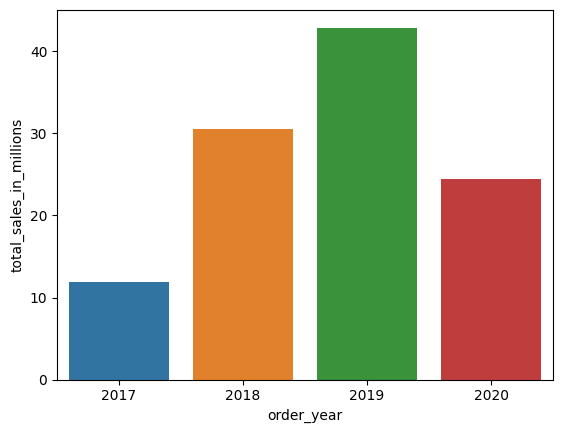

In [321]:
sns.barplot(x= revenue_trend_by_year['order_year'], y = revenue_trend_by_year['total_sales_in_millions'])

In [322]:
#let's find growth rate
revenue_trend_by_year['Growth Rate'] = revenue_trend_by_year['total_sales_in_millions'].pct_change() * 100
revenue_trend_by_year

,order_year,total_sales_in_millions,Growth Rate
0,2017,11.928556,NaN
1,2018,30.516892,155.830572
2,2019,42.895110,40.561856
3,2020,24.468717,-42.956860


<h5>Interpreting these growth rates will give insights into the revenue trends over the years:</h5>
<li>
    From 2017 to 2018, there was a significant increase in revenue, indicating strong growth.
</li>
<li>
    The growth rate slowed down from 2018 to 2019, but revenue still increased.
</li>
<li>
    However, there was a sharp decline in revenue from 2019 to 2020, indicating a decrease in sales compared to the previous year.
</li>


In [323]:
revenue_by_category  = df.groupby(['order_year','category'])['sales amount'].sum()/1000000
revenue_by_category = revenue_by_category.reset_index()
revenue_by_category = revenue_by_category.rename(columns={'sales amount':'total sales amount in millions'})
revenue_by_category['order_year'] = revenue_by_category['order_year'].astype('category')

Text(0.5, 1.0, 'Revenue growth of category by year')

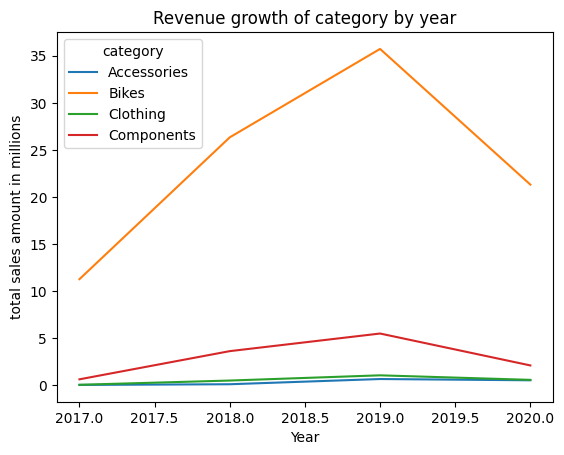

In [324]:
sns.lineplot(data=revenue_by_category,x='order_year',
             y="total sales amount in millions",hue=revenue_by_category["category"])
plt.xlabel("Year")
plt.title("Revenue growth of category by year")

<h4>Analysize single product data to get more insights from dataset</h4>

In [325]:
df[df['sku'] == 'BK-M82B-42'].sample(5)

,sales order,date,sku,product,category,subcategory,model,order quantity,product standard cost,total product cost,list price,sales amount,customer,country,region,city,postal code_x,customer_reseller,order_year,order_month
1148,SO44075,2017-09-01,BK-M82B-42,"Mountain-100 Black, 42",Bikes,Mountain Bikes,Mountain-100,1,1898.0944,1898.0944,3374.99,2024.994,Sports Commodities,United States,Northwest,Woodinville,98072,1,2017,9
3272,SO44566,2017-11-18,BK-M82B-42,"Mountain-100 Black, 42",Bikes,Mountain Bikes,Mountain-100,2,1898.0944,3796.1888,3374.99,4049.988,Journey Sporting Goods,United States,Southwest,Laredo,78040,1,2017,11
229,SO43683,2017-07-20,BK-M82B-42,"Mountain-100 Black, 42",Bikes,Mountain Bikes,Mountain-100,2,1898.0944,3796.1888,3374.99,4049.988,Great Bikes,United States,Northwest,Casper,82601,1,2017,7
3279,SO44567,2017-11-18,BK-M82B-42,"Mountain-100 Black, 42",Bikes,Mountain Bikes,Mountain-100,2,1898.0944,3796.1888,3374.99,4049.988,Brightwork Company,United States,Northwest,Las Vegas,89106,1,2017,11
4200,SO45045,2018-01-07,BK-M82B-42,"Mountain-100 Black, 42",Bikes,Mountain Bikes,Mountain-100,1,1898.0944,1898.0944,3374.99,2024.994,Yellow Bicycle Company,United States,Central,Saint Louis,63103,1,2018,1


<h5>Insights<h5>
<li>Here i found that sometimes we are selling product below standard cost, that means we are loosing money there.</li><br>
<li>let's find those order transaction where this situation occurred And how much money we loose because of it.</li><br>

In [326]:
print(df.shape)
temp_view = df[df['total product cost'] > df['sales amount']]
temp_view.shape

(121253, 20)


(21829, 20)

In [327]:
Total_loss_in_millions = (temp_view['sales amount'] - 
                          temp_view['total product cost']).sum()/1000000
Total_loss_in_millions.astype('float').round(2)

-3.32

According to result, company <b>lost 3.32 million dollars</b> for this situation

In [328]:
df.head(5)

,sales order,date,sku,product,category,subcategory,model,order quantity,product standard cost,total product cost,list price,sales amount,customer,country,region,city,postal code_x,customer_reseller,order_year,order_month
0,SO43659,2017-07-02,BK-M82B-42,"Mountain-100 Black, 42",Bikes,Mountain Bikes,Mountain-100,1,1898.0944,1898.0944,3374.99,2024.994,Better Bike Shop,United States,Southeast,Austell,30106,1,2017,7
1,SO43659,2017-07-02,BK-M82B-44,"Mountain-100 Black, 44",Bikes,Mountain Bikes,Mountain-100,3,1898.0944,5694.2832,3374.99,6074.982,Better Bike Shop,United States,Southeast,Austell,30106,1,2017,7
2,SO43659,2017-07-02,BK-M82B-48,"Mountain-100 Black, 48",Bikes,Mountain Bikes,Mountain-100,1,1898.0944,1898.0944,3374.99,2024.994,Better Bike Shop,United States,Southeast,Austell,30106,1,2017,7
3,SO43659,2017-07-02,BK-M82S-38,"Mountain-100 Silver, 38",Bikes,Mountain Bikes,Mountain-100,1,1912.1544,1912.1544,3399.99,2039.994,Better Bike Shop,United States,Southeast,Austell,30106,1,2017,7
4,SO43659,2017-07-02,BK-M82S-42,"Mountain-100 Silver, 42",Bikes,Mountain Bikes,Mountain-100,1,1912.1544,1912.1544,3399.99,2039.994,Better Bike Shop,United States,Southeast,Austell,30106,1,2017,7


In [329]:
df['margin percentage'] = ((df["sales amount"] - df["total product cost"])*100)/df["total product cost"]

In [330]:
aggregated_df = df.groupby(['sku', 'product']).agg({
    'order quantity': 'sum',
    'product standard cost': 'mean',
    'total product cost': 'mean',
    'margin percentage' : 'mean'
}).reset_index()

In [332]:
aggregated_df = aggregated_df.rename(columns={'margin percentage':'average margin percentage'})
top5_high_margin_product = aggregated_df.sort_values(by='average margin percentage',ascending=False).head(5)
top5_high_margin_product

,sku,product,order quantity,product standard cost,total product cost,average margin percentage
109,FE-6654,Fender Set - Mountain,2121,8.2205,8.2205,167.380330
257,TI-R982,HL Road Tire,858,12.1924,12.1924,167.379679
254,TI-M823,HL Mountain Tire,1396,13.0900,13.0900,167.379679
248,ST-1401,All-Purpose Bike Stand,249,59.4660,59.4660,167.379679
253,TI-M602,ML Mountain Tire,1161,11.2163,11.2163,167.378726


In [333]:
aggregated_df = df.groupby(['order_month','product']).agg({
                    'order quantity':'sum'
                }).reset_index()

In [349]:
filtered_df = aggregated_df[aggregated_df['product'].isin(top5_high_margin_product['product'])]
filtered_df['order_month'] = pd.Categorical(filtered_df['order_month'])

<Axes: xlabel='order_month', ylabel='order quantity'>

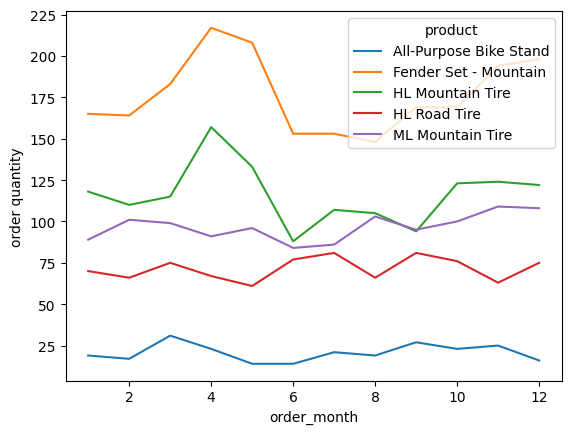

In [350]:
sns.lineplot(x='order_month',y='order quantity',hue='product', data=filtered_df)